# Haley Heynderickx

Loading in the necessary libraries. 

In [2]:
import pandas as pd
import glob
import os

Loading in and concatenating each csv file (individual csv files for each album). For this artist I had to to list the columns. 

In [3]:
df_hh= pd.concat(
    map(pd.read_csv, ["/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Other Songs-HH.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Fish Eyes EP.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/I Need To Start A Garden.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Among Horses III.csv"]), ignore_index=True)
df_hh.head()

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyric,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN


Unfortunately, this artist had released multiple albums/EPs in the same year. So I went back into the csv and added a column stating the month released, and re-read the files in. Then, to move around this issue these steps were done:
> 
1. Made a copy of the dataframe
2. Created a new column combining Year and Month columns
3. Grouped by Track_Title and Year_Month
4. Renamed songs to songs_hh
>

That way I had could group by month instead of year. Here is a list of the basics of each variable within the line of code:

> 
- X represents a list of each different lines of lyrics for a track title
- Groupby puts everything into a list
- .join strings all lyrics into a block of lyrics
- reset_index will make it easier to select all columns as we move forward
>

In [4]:
songs = df_hh.copy()
songs['Year_Month'] = songs['Year '].astype(str) + '-' + songs['Month'].astype(str)
songs = songs.groupby(["Track_Title", "Year_Month"]).agg({"Lyric": lambda x: " ".join(x)}).reset_index()
songs_hh = songs
songs_hh.head()

,Track_Title,Year_Month,Lyric
0,Big Ol' Miyazaki Tears Live,nan-nan,If you were clay and I am silt I'm built on we...
1,Construction At 8AM Live,nan-nan,Sentimental mornings as you Crawl outside your...
2,Crow Song,2018.0-October,I saw the scatterlight streaming Down through ...
3,Drinking Song,2016.0-January,There's a light at the end that I know Where c...
4,First I'm Sorry,2016.0-January,You had me first And traced my lips I'm sorry ...


Next, I say how many characters can be shown in a column within the dataframe. 

In [5]:
pd.options.display.max_colwidth = 1500

songs_hh.head()

,Track_Title,Year_Month,Lyric
0,Big Ol' Miyazaki Tears Live,nan-nan,If you were clay and I am silt I'm built on weak deposits as the ocean fills me Push and pull the break of the dawn If only I could hold it in a small clay pot And solitude they treat you well Until they burn you down And the dreaded voices tell you All your faults in small clay pots I've dropped them all around you as picked them up And hold my hand And hold my hand And hold my hand And hold my hand It's back it's back the demons on my back You knock them off so gently like they're bowling pins or cobwebs It's fine it's fine You whispered instead and held my hands so gently I could lengthen out my loneliness And hold my hand And hold my hand And hold my hand And hold my hand And I wish that I had known I wish that I had seen Wish that I had known how much you'd done for me And I wish that I had noticed Wish that I had noticed I wish that I had known how much you'd done for me And hold my hand And hold my hand You hold my hand You hold my hand If you were clay and I am silt I'm built on weak deposits as the ocean fills me Push and pull the break of the dawn If only I could hold it in a small clay pot
1,Construction At 8AM Live,nan-nan,Sentimental mornings as you Crawl outside your cave All the world around you's looking pale And I hope you don't hold virtue That the world is out to get you If your street's just getting paved And your attitude will constitute The pants over your legs And all the laws are drawn out just to fix you So I don't quite mind If it is sappy To ask how you are doing If you don't mind not lying Naked and a nuisance You still lie inside your bed Wondering what the world outside is wondering about And I hope you don't hold virtue That the world is out to get you That the world is out to get you That the world is out to get you That the world is out to get you That the world is out to get you While the men in hats get paid The world isn't out to get you The world isn't out to get you The world isn't out to get you While the men in hats get paid In orange hats get paid
2,Crow Song,2018.0-October,I saw the scatterlight streaming Down through the century trees Bloodfern and juniper Sweeteye and shattercane weeds I saw the cloud from the cabin Slate rock and teeming with storm Carrion bird caught in the hearth And killed by collision with door Feathers all over the floor I'll be home where I go I'll be home wherever I go I'll be home where I go someday Buckshot rang out in the distance Over and over again River the moon shiver I saw my sister jump in And I saw my brother in Dallas Quietly drunk every day Gentle and kind and lost in his mind And surprised when his wife went away And I saw the killers in costume And I saw their satellites burn And I saw them measure their money In whether they look like the people they hurt Maybe that's just who we were I'll be home where I go I'll be home wherever I go I'll be home where I go someday I wake up staggering lonely Birdsong and particle air Her letter in my jacket I carry myself down the stairs Lena she treated me easy She found me wherever I was Bloodfern and juniper Sweeteye and shattercane That never felt like enough That never felt like enough I'll be home where I go I'll be home wherever I go I'll be home where I go someday I'll be home where I go I'll be home wherever I go I'll be home where I go someday
3,Drinking Song,2016.0-January,There's a light at the end that I know Where culprits on carpets make sense of it all And the sky is all indigo And the young ones just want to go home And the edge of the world makes it seem That everyone gone is still singing the same song And I can believe in these things; That everyone's singing along The good and the bad and the gone And there's a light at the end of a dock Sending green little postcards to a city I love so much And the water makes sense of her laugh And wrinkles the backs of my hands There's a light at the end where I smoke And your name pu

Checking how many songs of Haley Heynderickx I have in total

In [6]:
len(songs_hh)

20

# Start of Analyzation

## Finding themes throughout each album by using sentiment analysis

First, we download the correct packages for NLP. 

Note: Slightly different grouping was done compared to Hozier and Florence + The Machine as this artist released mutliple albums or EPs in the same year. 

In [7]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop_words.extend is edited by individually putting in words that I deemed insignificant after vecotrizing and tokenizing each word to help the words for each theme become more specific. 

In [8]:
stop_words.extend(["oh", "like", "go", "sha", "la", "well", "could", "should", "would", "say", "got", "put", "knows", "known", "cause", "try", "yet", "still", "get", "make"])

min_df here is telling that if a word is seen less than 10% of the time that those words are not considered and will be excluded from the vocabulary.

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Defining the file paths for the CSV files
csv_files = ["/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Other Songs-HH.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Fish Eyes EP.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/I Need To Start A Garden.csv", "/Users/annacapels/Desktop/DS Projects/Haley Heynderickx Lyrics/csvs/Among Horses III.csv"]

#Reading in the CSV files as a DataFrame
df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)
print(df.columns.tolist())

df.columns = ['Artist ', 'Year', 'Month', 'Album_Title', 'Track_Title', 'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']

print(df.columns)

#Grouping the lyrics by track title and year+month
songs = df.copy()  # make a copy of the original DataFrame
songs['Year_Month'] = songs['Year'].astype(str) + '-' + songs['Month'].astype(str)  # create a new column that combines Year and Month
songs = songs.groupby(["Track_Title", "Year_Month"]).agg({"Lyric": lambda x: " ".join(x)}).reset_index()  # group by Track_Title and Year_Month


#Defining TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.1)

#Applying text vectorization to the lyrics
tfidf = vectorizer.fit_transform(songs['Lyric'])

['Artist ', 'Year ', 'Month', 'Album_Title', 'Track_Title', 'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']
Index(['Artist ', 'Year', 'Month', 'Album_Title', 'Track_Title',
       'Track_Number', 'Lyric', 'Line', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


Here I chose to do 6 different themes/topics. 

In [10]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 6)

In [11]:
topic_values = nmf.fit_transform(tfidf)

This bit of code below overall makes 'chooses' the individual words for each of the different topics. 

>
- for loop: loops through the different nmf components
- enumerate: lets us get individual value and index of value looping over
- message: what the individual words are in the topics AND write topic number while .format will add topic # + 1 (index starts @ zero)
- vertorizer: says for each topic grab the top 10 words for that index
>


In [12]:
for topic_num, topic in enumerate(nmf.components_):
    message = "topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 :-1]])
    print(message)

topic #1: honeycomb holding baby see god heaven around maybe good
topic #2: hold wish street bridge back world gently push pull
topic #3: eyes breaking look bed time river never letting body
topic #4: know mother something father ask ghosts see time wind
topic #5: light teeth home singing bad everyone broken gone hands
topic #6: gonna maybe nothing morning sour need garden inside jar


After the first run through of the code above, I run back through to include stop_words.extend, once again to make the words in the topics more specific. 

From those topics I identified different themes. 

In [13]:
topic_labels = ['religious', 'existential', 'nostalgia', 'family', 'unity', 'nature']

In [14]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics.head()

,religious,existential,nostalgia,family,unity,nature
0,0.000000,0.892123,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.268613,0.003837,0.000000,0.047945,0.108440
2,0.001042,0.039932,0.032813,0.000000,0.305051,0.020064
3,0.018106,0.000000,0.000000,0.081927,0.741584,0.000000
4,0.000000,0.092181,0.000000,0.805292,0.000000,0.000000


In [15]:
songs = songs.join(df_topics)
songs.head()

,Track_Title,Year_Month,Lyric,religious,existential,nostalgia,family,unity,nature
0,Big Ol' Miyazaki Tears Live,nan-nan,If you were clay and I am silt I'm built on weak deposits as the ocean fills me Push and pull the break of the dawn If only I could hold it in a small clay pot And solitude they treat you well Until they burn you down And the dreaded voices tell you All your faults in small clay pots I've dropped them all around you as picked them up And hold my hand And hold my hand And hold my hand And hold my hand It's back it's back the demons on my back You knock them off so gently like they're bowling pins or cobwebs It's fine it's fine You whispered instead and held my hands so gently I could lengthen out my loneliness And hold my hand And hold my hand And hold my hand And hold my hand And I wish that I had known I wish that I had seen Wish that I had known how much you'd done for me And I wish that I had noticed Wish that I had noticed I wish that I had known how much you'd done for me And hold my hand And hold my hand You hold my hand You hold my hand If you were clay and I am silt I'm built on weak deposits as the ocean fills me Push and pull the break of the dawn If only I could hold it in a small clay pot,0.000000,0.892123,0.000000,0.000000,0.000000,0.000000
1,Construction At 8AM Live,nan-nan,Sentimental mornings as you Crawl outside your cave All the world around you's looking pale And I hope you don't hold virtue That the world is out to get you If your street's just getting paved And your attitude will constitute The pants over your legs And all the laws are drawn out just to fix you So I don't quite mind If it is sappy To ask how you are doing If you don't mind not lying Naked and a nuisance You still lie inside your bed Wondering what the world outside is wondering about And I hope you don't hold virtue That the world is out to get you That the world is out to get you That the world is out to get you That the world is out to get you That the world is out to get you While the men in hats get paid The world isn't out to get you The world isn't out to get you The world isn't out to get you While the men in hats get paid In orange hats get paid,0.000000,0.268613,0.003837,0.000000,0.047945,0.108440
2,Crow Song,2018.0-October,I saw the scatterlight streaming Down through the century trees Bloodfern and juniper Sweeteye and shattercane weeds I saw the cloud from the cabin Slate rock and teeming with storm Carrion bird caught in the hearth And killed by collision with door Feathers all over the floor I'll be home where I go I'll be home wherever I go I'll be home where I go someday Buckshot rang out in the distance Over and over again River the moon shiver I saw my sister jump in And I saw my brother in Dallas Quietly drunk every day Gentle and kind and lost in his mind And surprised when his wife went away And I saw the killers in costume And I saw their satellites burn And I saw them measure their money In whether they look like the people they hurt Maybe that's just who we were I'll be home where I go I'll be home wherever I go I'll be home where I go someday I wake up staggering lonely Birdsong and particle air Her letter in my jacket I carry myself down the stairs Lena she treated me easy She found me wherever I was Bloodfern and juniper Sweeteye and shattercane That never felt like enough That never felt like enough I'll be home where I go I'll be home wherever I go I'll be home where I go someday I'll be home where I go I'll be home wherever I go I'll be home where I go someday,0.001042,0.039932,0.032813,0.000000,0.305051,0.020064
3,Drinking Song,2016.0-January,There's a light at the end that I know Where culprits on carpets make sense of it all And the sky is all indigo And the young ones just want to go home And the edge of the world makes it seem That everyone gone is still singing the same song And I can believe in these things; That everyone's singing along The good and the bad and the gone And there's a 

Going into the songs dataframe and grouping everything by year and month, then sum will figure out how often a topic appears in a song for each year and month. 

In [16]:
year_topics = songs.groupby("Year_Month").sum().reset_index()
year_topics

,Year_Month,Track_Title,Lyric,religious,existential,nostalgia,family,unity,nature
0,2016.0-January,Drinking SongFirst I'm SorryFish EyesSane,There's a light at the end that I know Where culprits on carpets make sense of it all And the sky is all indigo And the young ones just want to go home And the edge of the world makes it seem That everyone gone is still singing the same song And I can believe in these things; That everyone's singing along The good and the bad and the gone And there's a light at the end of a dock Sending green little postcards to a city I love so much And the water makes sense of her laugh And wrinkles the backs of my hands There's a light at the end where I smoke And your name puffs in colors with people I know The song that was stuck in her head Becomes all the words you forget And everyone is singing along The good and the bad and the goneYou had me first And traced my lips I'm sorry You held me from the dirt You had me first I'm sorry You are not my shelf To hold up my old self I'm sorry You need something else I am not myself I'm sorry Mother knows I drown in my lies Father knows I learned my lessons the second time Ask me where I'll go I'll say I do not know No I do not know No I do not know But you drowned in my waves And I can tell that you are hurt Please know I loved you first Please know I loved you But you are not my shelf To hold up my old self I'm sorry You need something else I am not my self I'm sorry (Oooh) Mother knows I drown in my lies Father knows I learned my lessons the second time Ask me where I'll go I'll say I do not know No I do not know No I do not knowSailor ey...,0.034459,0.097090,1.172993,0.992741,0.805951,0.006179
1,2018.0-March,JoNo FaceOom Sha La LaShow You A BodyThe Bug CollectorUntitled God SongWorth It,Joan You are alone Your kindness The sweetest that I've ever known Like honeycomb Holding the bee in the folds Be good Be good or be gone Oh I slept like a baby With you in my arms Oh I slept like a baby With you in my arms Out of harm Be well Bring our upsells And you tended your garden Like heaven and hell And you built the birds' houses To see if it helped at all And be known Lover of song And I still watch the fig tree You planted all grow And it's fruit is the sweetest That I've ever known Like honeycomb Holding the bee in the folds Like honeycomb Holding the bee in the folds Like honeycomb Holding the bee in the foldsFace me Face me entirely Tell me Tell me what's wrong here Is it the bridge of my nose Or the backs of my skin Is it the pull of my hips That you couldn't let in Is it the bridge between worlds That makes you feel alone Well I wish that I had known You're alone Well I wish that I had known Is it the bridge of my hair Or the back of my skin Is it the weight in the room That you couldn't hold in Is it the bridge between worlds That makes you feel alone Well I wish that I hadThe milk is sour I've barely been to college And I've been doubtful Of all that I have dreamed of The brink of my existence essentially is a comedy The gap in my teeth and all that I can cling to The milk is sour Sha la la Oom oom sha la la Oom sha la la Oom oom sha la la The milk is sour With olives on my thumbs And all that I have stuck to and all that I have clung to I've felt like ...,0.798161,0.562424,0.583899,0.124907,0.153626,1.569907
2,2018.0-October,Crow SongFrancis Little WindMother Slow Talkin' The Park,I saw the scatterlight streaming Down through the century trees Bloodfern and juniper Sweeteye and shattercane weeds I saw the cloud from the cabin Slate rock and teeming with storm Carrion bird caught in the hearth And killed by collision with door Feathers all over the floor I'll be home where I go I'll be home wherever I go I'll be home where I go someday Buckshot rang out in the distance Over and over again River the moon shiver I saw my sister jump in And I saw my brother in Dallas Quietly drunk every day Gentle and kind and lost in his mind And surprised when his wife w

Importing plotting libraries for data visualization. 

In [17]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, "Haley Heynderickx's frequency of themes found by music released each year")

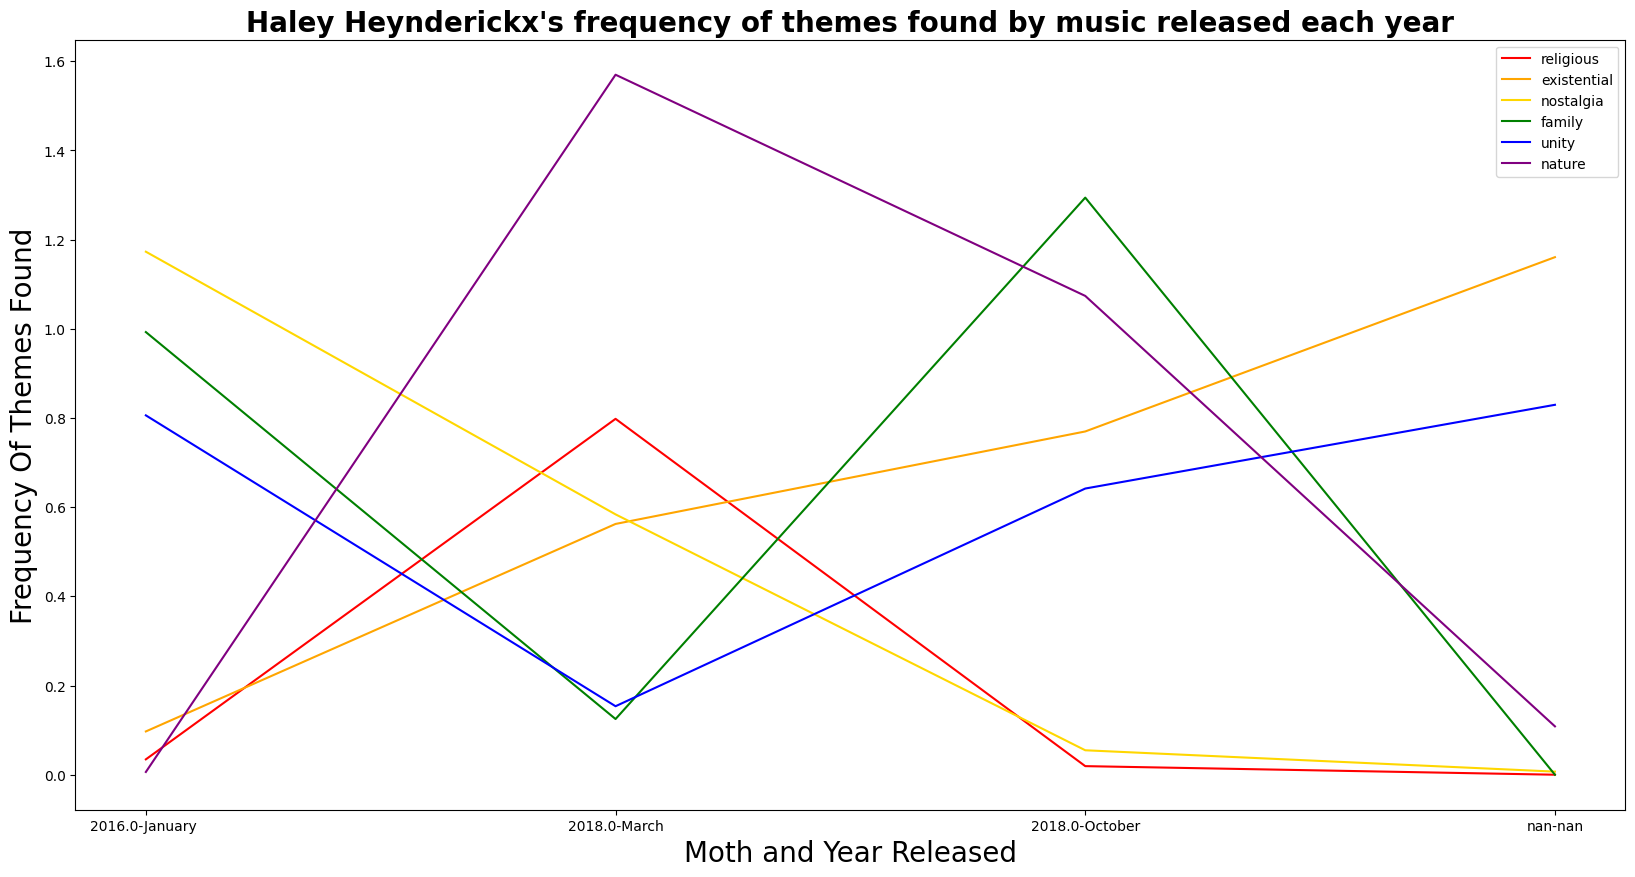

In [18]:
plt.figure(figsize = (20,10))
plt.plot(year_topics["Year_Month"], year_topics['religious'], label = topic_labels[0], c='red')
plt.plot(year_topics["Year_Month"], year_topics['existential'], label = topic_labels[1], c='orange')
plt.plot(year_topics["Year_Month"], year_topics['nostalgia'], label = topic_labels[2], c='gold')
plt.plot(year_topics["Year_Month"], year_topics['family'], label = topic_labels[3], c='green')
plt.plot(year_topics["Year_Month"], year_topics['unity'], label = topic_labels[4], c='blue')
plt.plot(year_topics["Year_Month"], year_topics['nature'], label = topic_labels[5], c='purple')
plt.legend()

#label to help keep track of each individual plots

#setting axis, title, + font
font1 = {'family':'sans', 'color': 'black', 'size':20}
plt.xlabel("Moth and Year Released", loc='center', fontdict=font1)
plt.ylabel("Frequency Of Themes Found", loc='center', fontdict=font1)
plt.title("Haley Heynderickx's frequency of themes found by music released each year", loc='center', fontdict=font1, fontweight='bold')


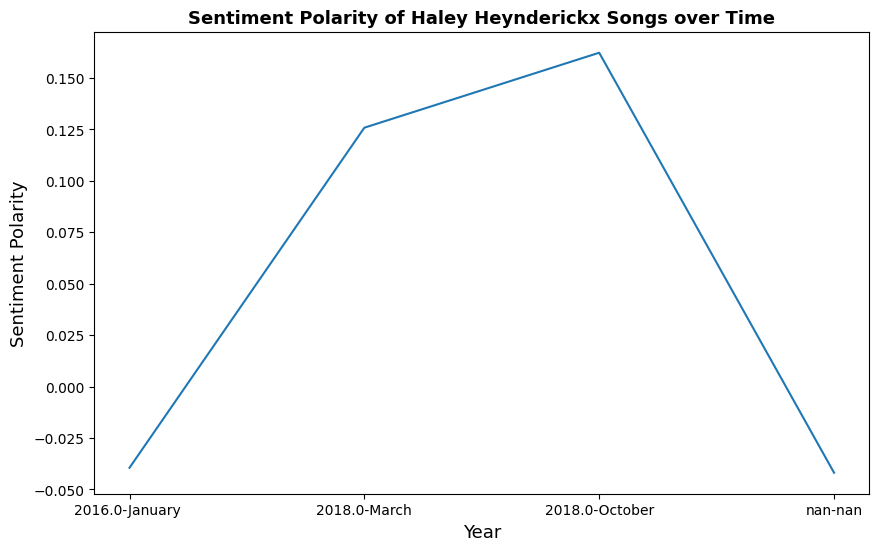

In [19]:
from textblob import TextBlob

#Defining a function to get the sentiment polarity score for each set of lyrics
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

#Applying the function to the lyrics column of the songs DataFrame
songs['Sentiment_Polarity'] = songs['Lyric'].apply(get_sentiment_polarity)

#Grouping the songs by year and then calculating the mean sentiment polarity for each year
year_sentiment = songs.groupby('Year_Month')['Sentiment_Polarity'].mean().reset_index()

#Ploting the sentiment polarity over time
font1 = {'family':'sans', 'color': 'black', 'size':13}
plt.figure(figsize=(10, 6))
plt.plot(year_sentiment['Year_Month'], year_sentiment['Sentiment_Polarity'])
plt.xlabel('Year', loc='center', fontdict=font1)
plt.ylabel('Sentiment Polarity', loc='center', fontdict=font1)
plt.title('Sentiment Polarity of Haley Heynderickx Songs over Time', loc='center', fontdict=font1, fontweight = 'bold')
plt.show()



## Lyric Generator

In [20]:
from collections.abc import Mapping
import markovify
import language_tool_python

#Combining all lyrics into a single string
lyrics = ' '.join(songs['Lyric'])

#Making a Markov model of the lyrics
model = markovify.Text(lyrics, state_size=2)

#Generating and correcting new sentences
tool = language_tool_python.LanguageTool('en-US')
for i in range(2):
    #Making a new sentence
    sentence = model.make_sentence()

    if sentence is not None:
        #Fixing grammar errors in the sentence
        corrected_sentence = tool.correct(sentence)

        #Printing the original and corrected sentences
        print('Original sentence:', sentence)
        print('Corrected sentence:', corrected_sentence)
    else:
        print('Error: Unable to generate a sentence.')

#Run time: 8 seconds

Original sentence: And it took hold of me Was someone planting him a daughter Was her hair as long as the river bed this time Picking fishheads and eating out their eyes?
Corrected sentence: And it took hold of me Was someone planting him a daughter Was her hair as long as the river bed this time Picking fish heads and eating out their eyes?
Error: Unable to generate a sentence.


Note: We see an Error as there is likely not enough data (lyrics) for the tool to create another additional sentence. 

## Sentiment Analysis

Importing necessary libraries

In [21]:
import nltk
import numpy as np
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annacapels/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Below, I put the boundaries to define the category negative as anything lower than a sentiment rating of -0.35. Positive is anything above 0.35 and neutral are any scores between -0.35 and 0.35. 

In [22]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

df['sentiment_rating'] = pd.DataFrame(df.Lyric.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_rating'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

df.head()

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyric,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sentiment_rating,sentiment
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive


## Lyrical Density

Importing libraries. 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Saving df with the lyrics to a csv 
trial_df = df 
trial_df.to_csv('Lyrics-HALEY HEYNDERICKX.csv')

In [25]:
df.head()

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyric,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sentiment_rating,sentiment
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive


In [26]:
df['characters'] = df.Lyric.str.len()
df['words'] = df.Lyric.str.split().str.len()
df['lines'] = df.Lyric.str.split('\n').str.len()
df['uniq_words'] = df.Lyric.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['uniq_words'] / df['words']

df.head()

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyric,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,sentiment_rating,sentiment,characters,words,lines,uniq_words,lexical_density
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral,30,8,1,8,1.000
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative,48,10,1,10,1.000
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral,35,8,1,7,0.875
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral,43,11,1,11,1.000
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive,32,6,1,6,1.000


In [27]:
#Renaming Columns so have Capatalized + 'Units'

df = df.rename(columns={
    'Lyric': 'Lyrics',
    'sentiment': 'Sentiment Category',
    'sentiment_rating': 'Sentiment Rating',
    'characters': 'Characters',
    'words': 'Number of Words',
    'lines': 'Number of Lines',
    'uniq_words': 'Number of Unique Words',
    'lexical_density': 'Lexical Density'
})

In [28]:
df.head()

,Artist,Year,Month,Album_Title,Track_Title,Track_Number,Lyrics,Line,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Sentiment Rating,Sentiment Category,Characters,Number of Words,Number of Lines,Number of Unique Words,Lexical Density
0,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If you were clay and I am silt,1,NaN,NaN,NaN,NaN,0.0000,neutral,30,8,1,8,1.000
1,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,I'm built on weak deposits as the ocean fills me,2,NaN,NaN,NaN,NaN,-0.4404,negative,48,10,1,10,1.000
2,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,Push and pull the break of the dawn,3,NaN,NaN,NaN,NaN,0.0000,neutral,35,8,1,7,0.875
3,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,If only I could hold it in a small clay pot,4,NaN,NaN,NaN,NaN,0.0000,neutral,43,11,1,11,1.000
4,Haley Heynderickx,NaN,NaN,NaN,Big Ol' Miyazaki Tears Live,NaN,And solitude they treat you well,5,NaN,NaN,NaN,NaN,0.5859,positive,32,6,1,6,1.000


Then I sum columns words and number of unique words, and divide total_uniq with total_words to get a total lyrical density. 
Lyrical density simplified is essentially the larger the density score the more lyrical or poetical the songs may seem. On the other hand, a smaller density score may mean that the songs are more straightforward and get directly to the point. 

In [29]:
df['Number of Words'].sum()

3747

In [30]:
def total_density():
    total_words = df['Number of Words'].sum()
    print('The total amount of words is',(total_words))
    total_uniq = df['Number of Unique Words'].sum()
    print('The total amount of unique words is',(total_uniq))
    return total_uniq / total_words

print('The total density is', (total_density()))

The total amount of words is 3747
The total amount of unique words is 3651
The total density is 0.9743795036028823


## Graphs comparing Sentiment, Lexical Desnity, and Unique Words. 

## Sentiment Category vs Lexical Density

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_1609/1859551052.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)


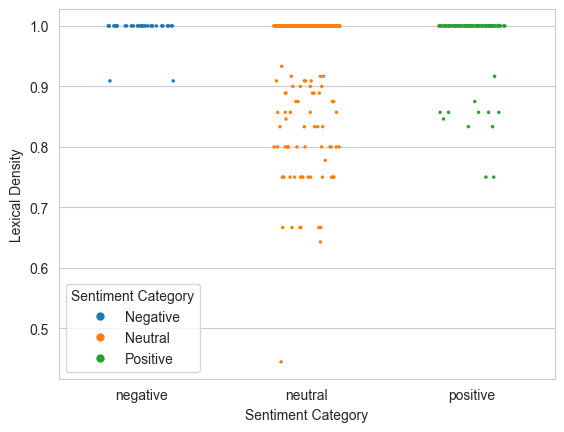

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, order=['negative', 'neutral', 'positive'], jitter=0.2, size=2.5, palette=custom_palette)

#Createing custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=7),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=7)]
plt.legend(title='Sentiment Category', loc='lower left', handles=legend_elements)

#Adding labels for x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Lexical Density')

#Showing the plot
plt.show()

This is another way of looking at the data, but I find this more difficult than the one above. 

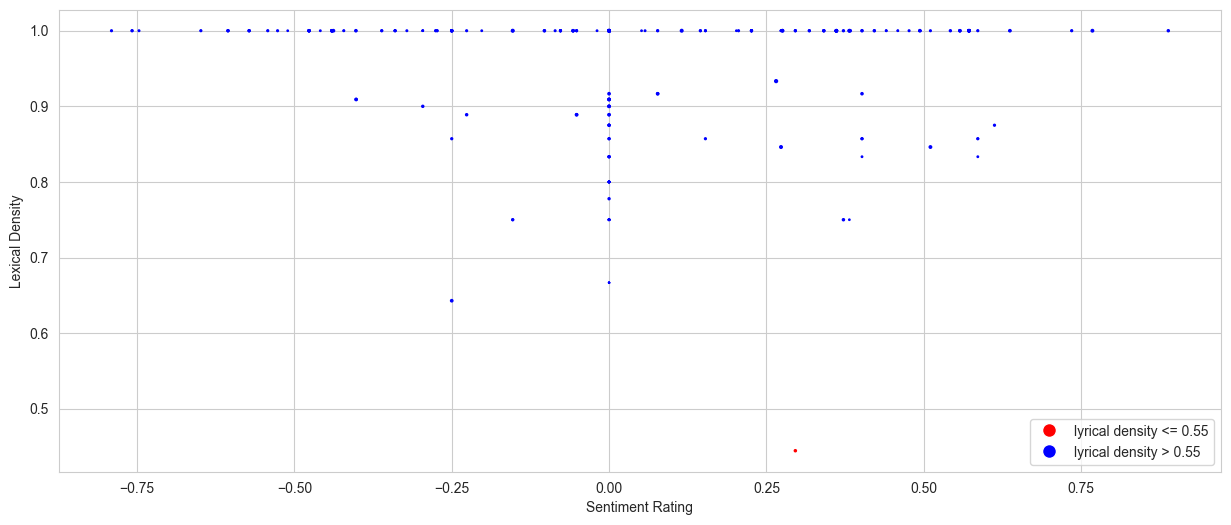

In [32]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Defining custom colors for the legend
colors = {'red': 'lyrical density <= 0.55', 'blue': 'lyrical density > 0.55'}

#Creating custom legend elements using Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=colors['red'], markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label=colors['blue'], markerfacecolor='blue', markersize=10)]

#Creating the scatter plot
df.plot.scatter(x='Sentiment Rating', y='Lexical Density', s=df['Characters']/20,
                c=np.where(df['Lexical Density'].le(0.55), "red", "blue"),
                figsize=(15, 6))

#Adding the custom legend to the plot
plt.legend(handles=legend_elements, loc='lower right')

#Showing the plot
plt.show()

#red=if lyrical density less than or equal to .55
#blue=data if lyrical density greater than .55
#The size of each dot is determined by the corresponding value in the characters column divided by 20.

To see if there is any linear relationship beween the variables I will find the correlation coefficient (also commonly known as the 'R Value') which measures the strength and direction of a linear relationship between two variables. 

Finding the R Value

In [33]:
import pandas as pd

#Calculating the correlation coefficient between Sentiment Rating and Lexical Density
corr_coeff = df['Sentiment Rating'].corr(df['Lexical Density'])

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: -0.01155790658768441


## Analysis of Sentiment Category vs Lexcial Density

There seems to be no statistically significant linear relationship between the variables of sentiment category and lexical density. 

## Sentiment Category vs Number of Unique Words

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_1609/3361886664.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)


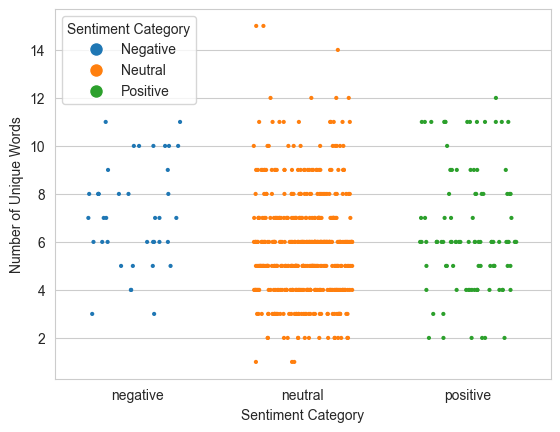

In [34]:
###WORKING...COMPARING:
#NUMBER OF UNIQUE WORDS VS SENTIMENT CATEGORY#

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom colors and legend
sns.stripplot(x='Sentiment Category', y='Number of Unique Words', data=df, order=['negative', 'neutral', 'positive'], jitter=0.3, size=3, palette=custom_palette)

#Creating a custom legend with three colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Neutral', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Sentiment Category', loc='upper left', handles=legend_elements)

#Adding labels for x and y axes
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Unique Words')

#Showing the plot
plt.show()

## Analysis of Sentiment Category vs Number of Unique Words

Finding the R Value. 

In [35]:
#NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY#

import pandas as pd

#Groupping the data by Sentiment Category and calculate the mean Number of Unique Words for each group
grouped_df = df.groupby('Sentiment Category')['Number of Unique Words'].mean()

#Finding the correlation coefficient (r value) between Number of Unique Words and Sentiment Category
corr_coeff = grouped_df.corr(pd.Series([0, 1, 2]))

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: nan


Since we got a null value for an R value, I decided to use  Kendall's rank correlation coefficient (also commonly known as Kendall's tau) is a measure of rank correlation between two variables; meaning it assess similarity of the orders of data points rather than the specific values of the variables themselves. I did this as I doubted that the number of unique words and sentiment category would be a linear relationship. 

In [36]:
#NUMBER OF UNIQUE WORDS + SENTIMENT CATEGORY#
# If the absolute value is close to 0
# then there is a weak or no monotonic relationship between the variables.

from scipy.stats import kendalltau

#Calculating the Kendall rank correlation coefficient between Lexical Density and Sentiment Category
kendall_coeff, kendall_pvalue = kendalltau(df['Number of Unique Words'], df['Sentiment Category'])

#Printing the correlation coefficient
print("Kendall Rank Correlation Coefficient:", kendall_coeff)

Kendall Rank Correlation Coefficient: -0.006623989344031223


From Kendall's tau we see that there is essentially no monotonic relationship between the variables sentiment category and number of unique words, as the number is so close to 0. 

## Sentiment Category vs Lexical Desnity vs Unique Words 

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_1609/3187391479.py:10: UserWarning: 
The palette list has fewer values (3) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.27, size=3, palette=custom_palette)


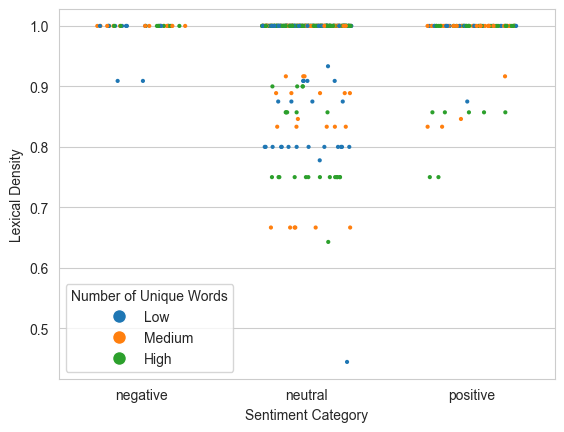

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

#Defining a custom color palette with three colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

#Stripping plot with custom legend
sns.stripplot(x='Sentiment Category', y='Lexical Density', data=df, hue='Number of Unique Words', order=['negative', 'neutral', 'positive'], jitter=0.27, size=3, palette=custom_palette)

#Creating a custom legend with three dots
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Low', markerfacecolor=custom_palette[0], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Medium', markerfacecolor=custom_palette[1], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='High', markerfacecolor=custom_palette[2], markersize=10)]
plt.legend(title='Number of Unique Words', loc='lower left', handles=legend_elements)

#Showing
plt.show()

Finding the R Values. 

Already found for:
Number of Unique Words vs Sentiment Category 
> 
- R Value: N/A
- Kendall Rank Correlation Coefficient: -0.00
>

Sentiment Category vs Lexical Density
>
- R Value: -0.01
- Kendall Rank Correlation Coefficient: Did not execute because an R Value was found. 
>

As we can see so far there have been no significant linear relationships between any variables yet. Additionally, the only relationship we haven't found yet is between Lexical Density and the Number of Unique Words. Again, we will check for an R value first, and if there is none present we will move onto doing a Kendall Rank Correlation. 

In [38]:
#LEXICAL DENSITY + NUMBER OF UNIQUE WORDS#

import pandas as pd

#Calculating the correlation coefficient between Lexical Density and Number of Unique Words
corr_coeff = df['Lexical Density'].corr(df['Number of Unique Words'])

#Printing the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

Correlation Coefficient: 0.1389796766541301


## Type-Token Ration (TTR)

TTR is a metric used to measure the lexical diversity or richness of a text as it calculates the ratio of unique words (types) to the total number of words (tokens). 
>
[forumla: TTR = (Number of Unique Words) / (Total Number of Words)]
>
Higher TTR indicates greater diversity of vocabulary while a lower TTR suggests a more repetitive vocabulary. 

Importing libraries.

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [40]:
text = trial_df.to_csv(sep=' ', index=False, header=False)


tokenized = word_tokenize(text)
len(tokenized)
len(set(tokenized))

1098

In [41]:
def lexical_richness(text):
    return len(set(text)) / len(text)

#Getting the percentage
lexical_richness(tokenized)

0.05228073516807923

## Sentiment Analysis of Albums and Songs

### Sentiment Rating for Each Album or EP

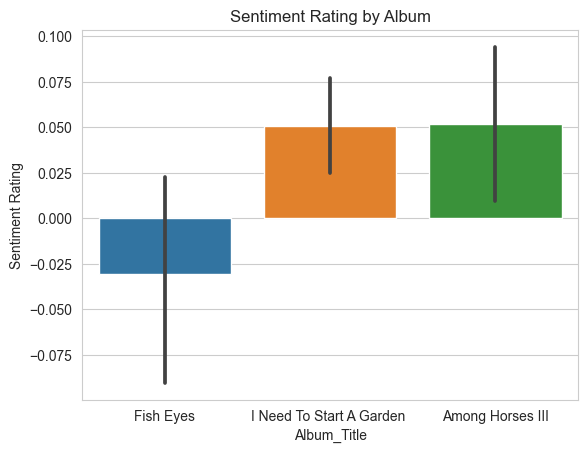

In [42]:
import seaborn as sns

#Creating a palette of pastel colors
palette = sns.color_palette('pastel')

#Making a bar plot of sentiment rating by album with pastel-colored bars
sns.barplot(x='Album_Title', y='Sentiment Rating', data=df) #palette=palette)

#Setting title and labels
plt.title('Sentiment Rating by Album')
plt.xlabel('Album_Title')
plt.ylabel('Sentiment Rating')
plt.show()


### Sentiment Ratings for Each Track for Each Album

### Fish Eyes EP

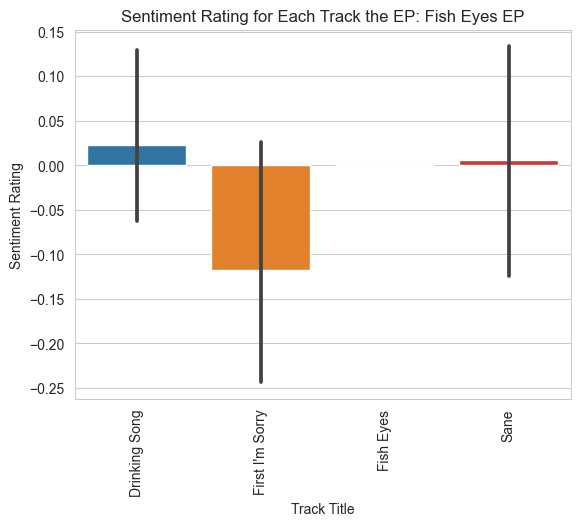

In [43]:
import seaborn as sns

#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Fish Eyes'])

#Setting title and labels
plt.title('Sentiment Rating for Each Track the EP: Fish Eyes EP')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()


Note: It appears that the song 'Fish Eyes' had no sentiment rating. Therefore, it is shown as blank. 

Note: Clearing the white space as 'Album_Title' wasn't being recognized for the next graph.

In [44]:
#Cleaning up the 'Album_Title' column by stripping leading and trailing whitespace
df['Album_Title'] = df['Album_Title'].str.strip()

#Checking the list of unique album titles again
unique_albums = df['Album_Title'].unique()
print(unique_albums)

[nan 'Fish Eyes' 'I Need To Start A Garden' 'Among Horses III']


In [45]:
#Checking to see if worked
unique_albums = df['Album_Title'].unique()
"I Need To Start A Garden" in unique_albums


True

### I Need To Start A Garden

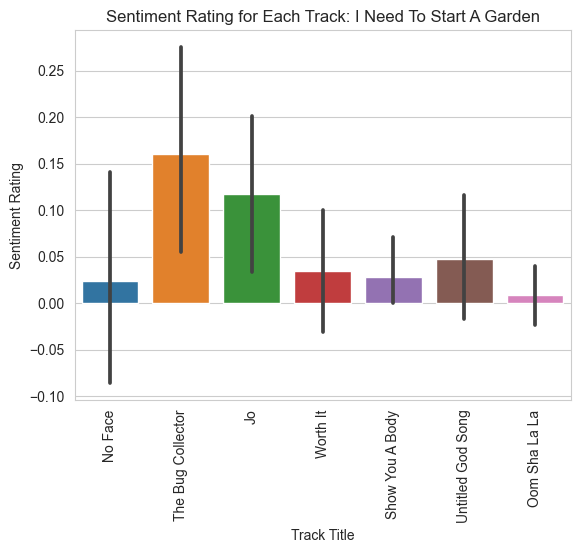

In [46]:
#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data = df[df['Album_Title'] == "I Need To Start A Garden"])

#Setting title and labels
plt.title('Sentiment Rating for Each Track: I Need To Start A Garden')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### Among Horses III

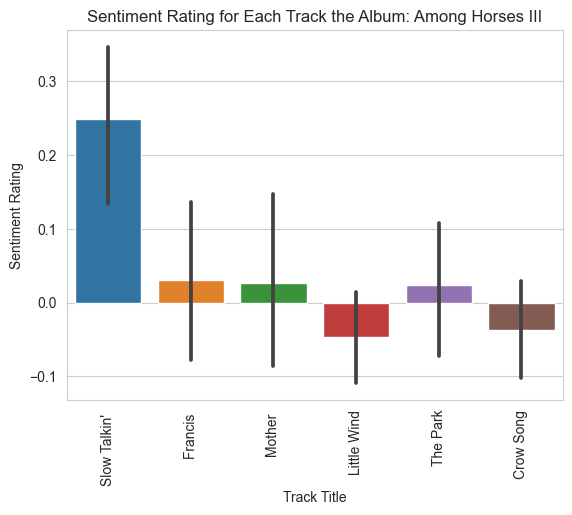

In [47]:
#Creating a bar plot of sentiment rating by song title for one album
sns.barplot(x='Track_Title', y='Sentiment Rating', data=df[df['Album_Title'] == 'Among Horses III'])

#Setting title and labels
plt.title('Sentiment Rating for Each Track the Album: Among Horses III')
plt.xlabel('Track Title')
plt.ylabel('Sentiment Rating')
plt.xticks(rotation=90)
plt.show()

### All Songs and Their Sentiment Ratings

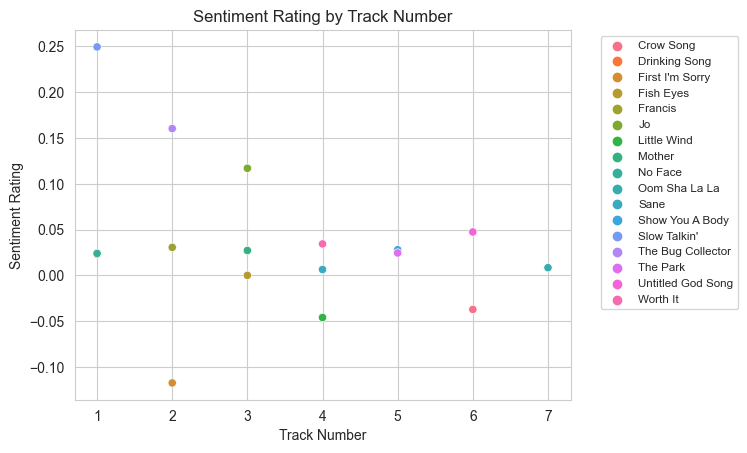

In [48]:
#Grouping the data by track title and track number and compute the average sentiment rating for each track
grouped = df.groupby(['Track_Title', 'Track_Number'])['Sentiment Rating'].mean().reset_index()

#Making a scatter plot of sentiment rating by track number for each track title
sns.scatterplot(x='Track_Number', y='Sentiment Rating', hue='Track_Title', data=grouped)

#Setting title and labels
plt.title('Sentiment Rating by Track Number')
plt.xlabel('Track Number')
plt.ylabel('Sentiment Rating')

#Fixing the font size and location of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

## Common Words

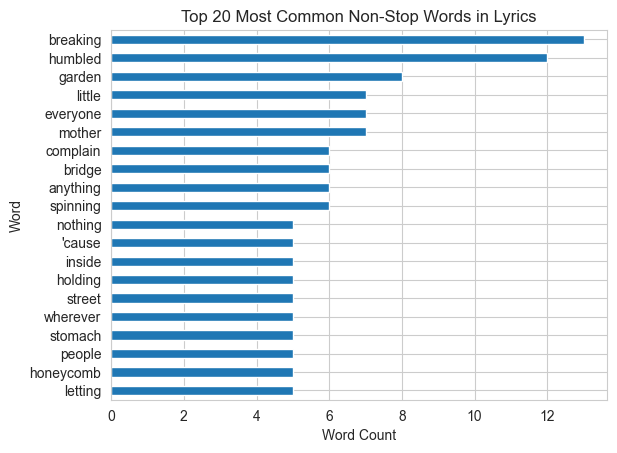

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#stopwords...from above 
stop_words.extend(["oh", "like", "go", "sha", "la", "well", "could", "should", "would", "say", "got", "put", "knows", "known", "cause", "try", "yet", "still", "get", "make"])

#Tokenizing the lyrics column and filter out stop words and words with length <= 5
words = [w for w in nltk.word_tokenize(' '.join(df.Lyrics).lower()) if w not in stopwords.words('english') and len(w) > 5]

#Making a pandas series with the word counts and plot the top 20 words in a horizontal bar chart
pd.Series(words).value_counts()[:20][::-1].plot(kind='barh')

#Setting title and labels
plt.title('Top 20 Most Common Non-Stop Words in Lyrics')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()